# KNN ( K Nearest Neighbors)

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [2]:
#read the data
bcData = pd.read_csv('wisc_bc_data.csv')

In [3]:
#Understanding the data

In [4]:
bcData.shape

(569, 32)

In [5]:
bcData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [6]:
bcData.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [7]:
bcData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [8]:
#changing the datatype of the diagnosis to Category
bcData['diagnosis'] = bcData['diagnosis'].astype('category')
bcData['diagnosis'].dtypes

CategoricalDtype(categories=['B', 'M'], ordered=False)

In [9]:
bcData.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
id,569.0,30371831.4,125020585.6,8670.0,869218.0,906024.0,8813129.0,911320502.0
radius_mean,569.0,14.1,3.5,7.0,11.7,13.4,15.8,28.1
texture_mean,569.0,19.3,4.3,9.7,16.2,18.8,21.8,39.3
perimeter_mean,569.0,92.0,24.3,43.8,75.2,86.2,104.1,188.5
area_mean,569.0,654.9,351.9,143.5,420.3,551.1,782.7,2501.0
smoothness_mean,569.0,0.1,0.0,0.1,0.1,0.1,0.1,0.2
compactness_mean,569.0,0.1,0.1,0.0,0.1,0.1,0.1,0.3
concavity_mean,569.0,0.1,0.1,0.0,0.0,0.1,0.1,0.4
points_mean,569.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2
symmetry_mean,569.0,0.2,0.0,0.1,0.2,0.2,0.2,0.3


In [10]:
bcData.groupby(['diagnosis']).count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


Class distribution among B and M is almost 2:1

In [11]:
bcData = bcData.drop('id', axis=1)
#dropping id as it is not required for prediction

In [12]:
#define independent & dependent variables

X = bcData.drop('diagnosis', axis=1)
y = bcData['diagnosis']

In [13]:
#Since scales of the features is not known, so we are using zscore to scale the data.

X1 = X.apply(zscore)
X1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,...,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,...,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,...,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492


In [14]:
#spliting the data into train & test

Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y, test_size = 0.2, random_state = 1)

In [15]:
#applying KNeighborsClassifier and checking the performance

KNN = KNeighborsClassifier(n_neighbors=6,
                           weights='distance'
                          )
KNN.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [16]:
KNN.score(Xtest, ytest)

0.9473684210526315

In [17]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

In [18]:
test_predict = KNN.predict(Xtest)

Confusion Matrix


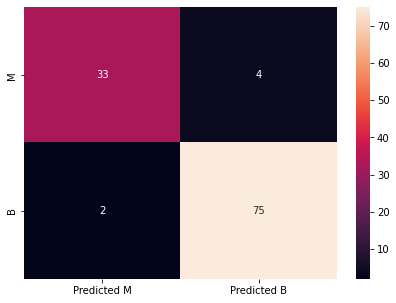

In [19]:
# calculate accuracy measures and confusion matrix

print("Confusion Matrix")

cm =confusion_matrix(ytest, test_predict, labels=['M','B'])

df_cm = pd.DataFrame(cm, index = [i for i in ['M','B']],
                    columns = [i for i in ['Predicted M', 'Predicted B']])

plt.figure(figsize = (7,5))

sns.heatmap(df_cm, annot=True);

In [20]:
print('Classification Report:')
print(classification_report(ytest, test_predict, labels = ['M', 'B']))

Classification Report:
              precision    recall  f1-score   support

           M       0.94      0.89      0.92        37
           B       0.95      0.97      0.96        77

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [21]:
print('Score:{0:.2f}%'.format(KNN.score(Xtest,ytest)*100))

Score:94.74%


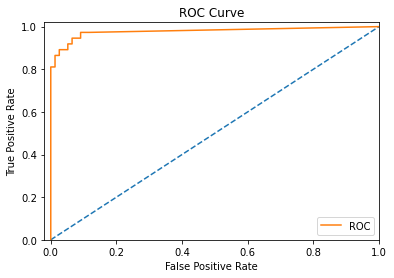

In [22]:
#ROC curve
prob = KNN.predict_proba(Xtest)[:,1]

fpr, tpr, threshold = roc_curve(ytest, prob,pos_label='M')

plt.plot([0,1],[0,1], linestyle='--')

plt.plot(fpr, tpr, label='ROC')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [24]:
print('AUC:{0:.2f}%'.format(roc_auc_score(ytest,prob)*100))

AUC:97.79%
